## Observations and Insights 

1. Best drugs from the experiment: Ramicane, Capomulin, Ceftamin, Infubinol are the top 4 drugs from the experiment in terms of lowest tumor volumns. Ramicane, Capomulin are the best drugs with a mean tumor volume of 34.9 mm3 and 36.6 mm3 at last timepoint.

2. Line plot for Capomulin for mouse l509: The line plot showed that the overall tumor volume decresed with time for mice treated with Capomulin. However, the tumor volume had a steady spike upto 20 days and then the volume went down. Also, there were small spikes in volume intermittently after that. Around 35 days, the tumor volume was the least , however it started increasing again till the end of the expiment, which is 45 days. It would be intresting to know what caused these spikes in growth and if after 45 days, the  tumor would have continued to grow further. We do not have sufficient data to analyze these scenarios.

3. Corelation & Linear regresion for Capomulin: The correlation between mouse weight and average tumor volume shows that mouse weight is directly protional to the increase in tumor volume. The correlation between both the factors is 0.84 which suggests a very strong coorelation. The r-squared value of 70.8% suggests that the regression model fits well with the data set of weight vs tumor vol. The model also has a very low p value of 1.322e-07. Thus indicating that changes in the weight of mice is related to changes in tumor volume and that the model explains a lot of the response variability.

4. Survival Rates of mice for Capomulin: As seen in the analysis (Survival Rate of Mice in the experiment section), 21 out of 25 mice survived the experiment when treated with Capomulin. This is the highest survival rate among all drugs as seen in the bar graph. 

Conclusion:
The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. Capomulin was definitely one of the best drugs along with Ramicane, recording lowest tumor volumes. The tumor volume for mice in the experiment defintely reduced from the intial 45 mm3, the upper quartile being 40.15 mm3 and lower quartile being 32.37mm3. However, mice weighing more had higher tumor volume, thus indicating that the drug works better if the weight is less. Also, there were spikes in mouse weights (as representd by the line graph) over the period of the experiment. It will be worthwhile to look into it futher as to what caused these spikes. 
Thus, Capomulin, with high survival rates and low mean tumor volume is definitely faring well in the experiment as compared to other treatment regimens.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#study_results
#mouse_metadata
# Combine the data into a single dataset
mouse_study_df=pd.merge(mouse_metadata, study_results, on="Mouse ID", suffixes=("_Mouse", "_Study"), how="outer")
mouse_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
print(mouse_study_df["Mouse ID"].count())

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=mouse_study_df.groupby(["Mouse ID","Timepoint"]).size().sort_values(ascending=False).reset_index(name="Frequency")
dup_mice

,Mouse ID,Timepoint,Frequency
0,g989,15,2
1,g989,0,2
2,g989,10,2
3,g989,5,2
4,g989,20,2
...,...,...,...
1883,q610,30,1
1884,q610,35,1
1885,q633,0,1
1886,q633,5,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice=dup_mice.loc[dup_mice["Frequency"]>1]
dup_mice

,Mouse ID,Timepoint,Frequency
0,g989,15,2
1,g989,0,2
2,g989,10,2
3,g989,5,2
4,g989,20,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_study_df = mouse_study_df.drop_duplicates(subset=(['Mouse ID', 'Timepoint']), keep='first')
clean_mice_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_mice_study_df["Mouse ID"].count())

1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#group by on Drug Regimen
drug_regimen_group_df=clean_mice_study_df.groupby('Drug Regimen')

#mean
drugs_mean=drug_regimen_group_df["Tumor Volume (mm3)"].mean()

#median
drugs_median=drug_regimen_group_df["Tumor Volume (mm3)"].median()

#variance
drugs_variance=drug_regimen_group_df["Tumor Volume (mm3)"].var()

#standard deviation
drugs_stan_deviation=drug_regimen_group_df["Tumor Volume (mm3)"].std()

#sem
drugs_sem=drug_regimen_group_df["Tumor Volume (mm3)"].sem()

#create dataframe with stats
Drugs_Summary_df=pd.DataFrame({"Mean":drugs_mean
                              ,"Median":drugs_median
                              ,"Variance":drugs_variance
                              ,"Standard Deviation":drugs_stan_deviation
                              ,"SEM":drugs_sem
                             })

#formatting
Drugs_Summary_df.style.format("{:.2f}")


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using numpy and scipy.stats to calculate measures of central tendency

#mean
numpy_mean=drug_regimen_group_df['Tumor Volume (mm3)'].aggregate(np.mean) 

#median
numpy_median=drug_regimen_group_df['Tumor Volume (mm3)'].aggregate(np.median) 

#variance
numpy_var=drug_regimen_group_df['Tumor Volume (mm3)'].aggregate(np.var) 

#standard deviation
numpy_std=drug_regimen_group_df['Tumor Volume (mm3)'].aggregate(np.std) 

#SEM
stats_sem=drug_regimen_group_df['Tumor Volume (mm3)'].aggregate(st.sem) 

#Create dataframe with stats
Alt_Drugs_Summary_df=pd.DataFrame({"Mean":numpy_mean
                                  ,"Median":numpy_median
                                  ,"Variance":numpy_var
                                  ,"Standard Deviation":numpy_std
                                  ,"SEM":stats_sem
                                 })

#formatting
Alt_Drugs_Summary_df.style.format("{:.2f}")

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

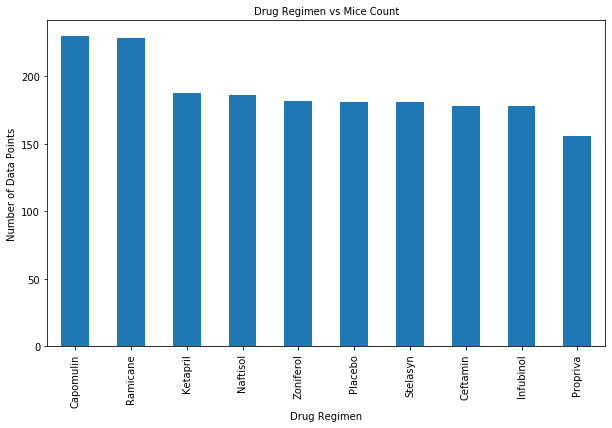

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

#count of mice per Drug Regimen
counts=clean_mice_study_df['Drug Regimen'].value_counts()

#Plot bar graph using Pandas
bar_plot = counts.plot(kind='bar' , figsize=(10,6));
bar_plot.set_alpha(0.8)
bar_plot.set_title("Drug Regimen vs Mice Count", fontsize=10)
bar_plot.set_xlabel("Drug Regimen", fontsize=10)
bar_plot.set_ylabel("Number of Data Points", fontsize=10);


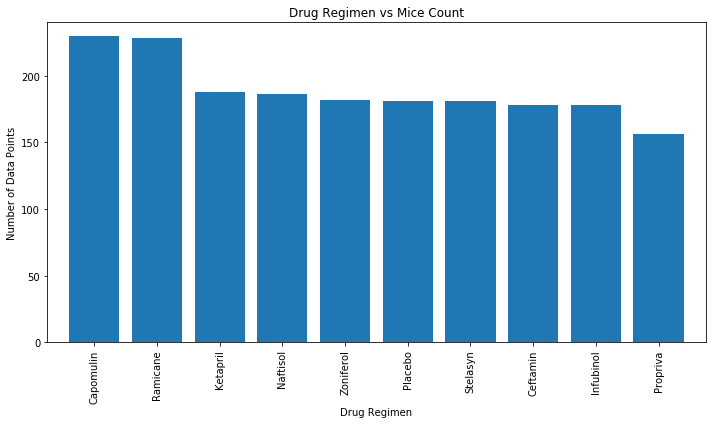

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#length of count of mice per Drug Regimen
x_axis = np.arange(len(counts))

#List of drugs for x axis tick locations
drug_list= clean_mice_study_df['Drug Regimen'].value_counts().index

#plot bar graph using pyplot
f, ax = plt.subplots(figsize=(10,6))
plt.bar(x_axis, counts,  align="center" )

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [drug for drug in drug_list],  rotation='vertical')

#set labels
plt.title("Drug Regimen vs Mice Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(counts)+10)

plt.tight_layout()
plt.show()

## Pie Plots

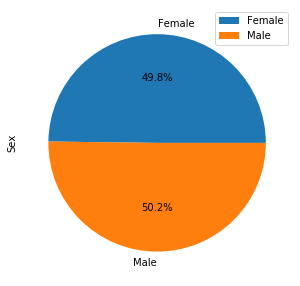

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#total unique mice count
Mice_count=clean_mice_study_df['Mouse ID'].nunique()

#group by gender
gender_group_df=clean_mice_study_df.groupby("Sex")

#count per group
count_gender=gender_group_df["Mouse ID"].nunique()

#count_gender
percentage_gender=round((count_gender/Mice_count)*100,1)

#Gender Demographics
mice_gender_df=pd.DataFrame({"Total Count":count_gender, "Sex":percentage_gender})

#Pandas pie plot
pie_plot = mice_gender_df.plot.pie(y='Sex',autopct='%1.1f%%', figsize=(5, 5))


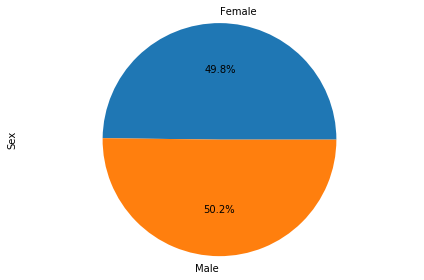

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#generate df for mice gender & sex percentage
mice_gender_py_df=pd.DataFrame({"Total Count":count_gender, "Sex Percentage":percentage_gender})

#Plot pie graph using pyplot
pie_py_plot=plt.pie( mice_gender_py_df['Sex Percentage'],labels=mice_gender_py_df.index.get_level_values(0),shadow=False, autopct='%1.1f%%')

#labels
plt.ylabel("Sex")

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#To Find best drugs - Get the drugs with the lowest mean tumor volume at last timepoint (45 days)

#Find the max timepoint on the entire data set to find which mice survived the experiment (will use to find best drug)
max_timepoint=max(clean_mice_study_df['Timepoint'])

#Fetch the tumor vol for last timepoint of each mice
last_timepoint=clean_mice_study_df.sort_values("Timepoint", ascending=True).groupby(['Mouse ID']).last()
 
#new_2=new_1.sort_values(["Tumor Volume (mm3)"], ascending=True)

#Fetch tumor volume where the last point is the maximum timepoint of the entire df
max_last_timepoint=last_timepoint.loc[last_timepoint["Timepoint"]==max_timepoint]

#Group the above data set by Drug Regimen
Drug_groupby=max_last_timepoint.groupby('Drug Regimen')

#Find the mean of latest timepoiint of each drug and fetch the top 4 drugs

top_4_drugs=Drug_groupby['Tumor Volume (mm3)'].mean().sort_values().head(4)
print ("Mean Tumor Volume at last timepoint for top 4 drugs")
print(top_4_drugs)

#Create drug list 
top_4_drug_list=top_4_drugs.index.get_level_values(0)

#Create individual lists of Tumor volume of top 4 drugs to use in IQR calculation & box plot
#Drug 1
list_1_df=last_timepoint[last_timepoint["Drug Regimen"].str.match(top_4_drug_list[0])]
list_1=list_1_df['Tumor Volume (mm3)'].values.tolist() 

#Drug 2
list_2_df=last_timepoint[last_timepoint["Drug Regimen"].str.match(top_4_drug_list[1])]
list_2=list_2_df['Tumor Volume (mm3)'].values.tolist() 

#Drug 3
list_3_df=last_timepoint[last_timepoint["Drug Regimen"].str.match(top_4_drug_list[2])]
list_3=list_3_df['Tumor Volume (mm3)'].values.tolist() 

#Drug 4
list_4_df=last_timepoint[last_timepoint["Drug Regimen"].str.match(top_4_drug_list[3])]
list_4=list_4_df['Tumor Volume (mm3)'].values.tolist()

    
#Calculate IQR for the top  4 drugs
print("------------Quartiles & IQR for each drug --------------")
#Drug 1
quartiles1 = list_1_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

#Print quratiles
print(f"{top_4_drug_list[0]}:")
print(f"The lower quartile of tumor volume is: {lowerq1}")
print(f"The upper quartile of tumor volume is: {upperq1}")
print(f"The interquartile range of tumor volume is: {iqr1}")
print(f"The the median of tumor volume is: {quartiles1[0.5]} ")

#Calculate upper bound, lower bound, outliers using 1.5 method
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

#print outliers if any
outlier_tumor_vol1 = list_1_df.loc[(list_1_df['Tumor Volume (mm3)'] < lower_bound1) | (list_1_df['Tumor Volume (mm3)'] > upper_bound1)]
print("-------------------------------------")

#Drug 2
quartiles2 = list_2_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

#Print quratiles
print(f"{top_4_drug_list[1]}:")
print(f"The lower quartile of tumor volume is: {lowerq2}")
print(f"The upper quartile of tumor volume is: {upperq2}")
print(f"The interquartile range of tumor volume is: {iqr2}")
print(f"The the median of tumor volume is: {quartiles2[0.5]} ")

#Calculate upper bound, lower bound, outliers using 2.5 method
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

#print outliers if any
outlier_tumor_vol2 = list_2_df.loc[(list_2_df['Tumor Volume (mm3)'] < lower_bound2) | (list_2_df['Tumor Volume (mm3)'] > upper_bound2)]
print("-------------------------------------")

#Drug 3
quartiles3 = list_3_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

#Print quratiles
print(f"{top_4_drug_list[2]}:")
print(f"The lower quartile of tumor volume is: {lowerq3}")
print(f"The upper quartile of tumor volume is: {upperq3}")
print(f"The interquartile range of tumor volume is: {iqr3}")
print(f"The the median of tumor volume is: {quartiles3[0.5]} ")

#Calculate upper bound, lower bound, outliers using 3.5 method
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

#print outliers if any
outlier_tumor_vol3 = list_3_df.loc[(list_3_df['Tumor Volume (mm3)'] < lower_bound3) | (list_3_df['Tumor Volume (mm3)'] > upper_bound3)]
print("-------------------------------------")

#Drug 4
quartiles4 = list_4_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

#Print quratiles
print(f"{top_4_drug_list[3]}:")
print(f"The lower quartile of tumor volume is: {lowerq4}")
print(f"The upper quartile of tumor volume is: {upperq4}")
print(f"The interquartile range of tumor volume is: {iqr4}")
print(f"The the median of tumor volume is: {quartiles4[0.5]} ")

#Calculate upper bound, lower bound, outliers using 4.5 method
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

#print outliers if any
outlier_tumor_vol4 = list_4_df.loc[(list_4_df['Tumor Volume (mm3)'] < lower_bound4) | (list_4_df['Tumor Volume (mm3)'] > upper_bound4)]
print("-------------------------------------")

#Contact all outlier data frames
concat_frames = [outlier_tumor_vol1, outlier_tumor_vol2, outlier_tumor_vol3,outlier_tumor_vol4]

outlier_tumor_vol = pd.concat(concat_frames)

outlier_tumor_vol

Mean Tumor Volume at last timepoint for top 4 drugs
Drug Regimen
Ramicane     34.955595
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Name: Tumor Volume (mm3), dtype: float64
------------Quartiles & IQR for each drug --------------
Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------
Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------
Ceftamin:
The lower quartile 

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
c326,Infubinol,Female,18,25,5,36.321346,0


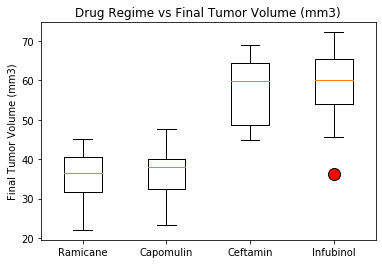

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Generate list for box plot

data_to_plot=[list_1, list_2, list_3, list_4]

#Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regime vs Final Tumor Volume (mm3)')
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,linestyle='none', markeredgecolor='black')
ax1.boxplot(data_to_plot,labels=top_4_drug_list,flierprops=flierprops )


plt.show()

## Line and Scatter Plots

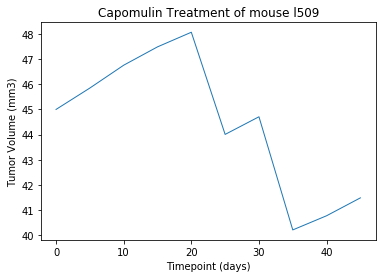

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#generate dataframe for with all records for mice l509 and Capomulin drug
Capomulin_df=clean_mice_study_df[clean_mice_study_df["Drug Regimen"].str.match('Capomulin') &
                                clean_mice_study_df["Mouse ID"].str.match('l509')]

#Select only required columns in dataframe 
Capomulin_l509_df=Capomulin_df[['Timepoint', 'Tumor Volume (mm3)']]

#find highest limit for x axis
max_time=max(Capomulin_l509_df['Timepoint'])+1

#set values for x and y axis
x_axis = np.arange(0,max_time,5)
y_axis=Capomulin_l509_df['Tumor Volume (mm3)'].values.tolist() 

#Plot the line graph
Tumor_Volume = plt.plot(x_axis, y_axis, linewidth=1, label="Tumor Volume (mm3)")

# Give the chart a title, x label, and y label
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

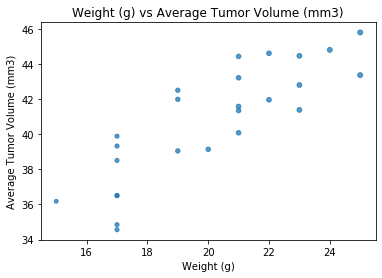

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Generate df with records for Capomulin drug
mice_Capomulin_df=clean_mice_study_df[clean_mice_study_df["Drug Regimen"].str.match('Capomulin') ]

#Group by mouse ID and weight for above df
mice_Cap_group=mice_Capomulin_df.groupby(['Mouse ID','Weight (g)'])

#average tumor volume for the Capomulin regimen
tumor_mean=mice_Cap_group["Tumor Volume (mm3)"].mean()

#Create dataframe for average tumor volume for the Capomulin regimen
mice_Cap_group_df=pd.DataFrame({"Average Tumor Volume (mm3)":tumor_mean})

#set x axis
x_axis=mice_Cap_group_df.index.get_level_values(1)

#Generate scatter plot
plt.scatter(x_axis, tumor_mean,s=x_axis, alpha=0.75)

# Give the chart a title, x label, and y label
plt.title("Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717
The p value is: 1.3225722434712642e-07


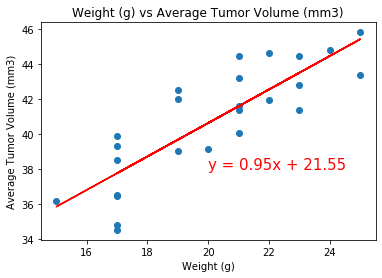

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
correlation = st.pearsonr(x_axis,tumor_mean)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Perform a linear regression on weight versus avg tumor vol
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_axis, tumor_mean)

# Create equation of line to calculate predicted tumor vol
vc_fit = vc_slope * x_axis + vc_int

#calculate line equation for annotation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

#print r sq
print(f"The r-squared is: {vc_r**2}")

#print p value
print(f"The p value is: {vc_p}")

# Plot the linear model on top of scatter plot for Weight (g) vs Average Tumor Volume (mm3)

plt.scatter(x_axis, tumor_mean)
plt.plot(x_axis,vc_fit,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

Extra Analysis: Survival Rate of Mice in the experiment

In [18]:
#Survival Rate of Mice in the experiment

#Find the min timepoint on the entire data set (we already have max timepoint from a previous step)
min_timepoint=min(clean_mice_study_df['Timepoint'])

#Fetch mice count for first and last timepoint
last_timepoint1=clean_mice_study_df.loc[(clean_mice_study_df["Timepoint"]==max_timepoint) ]
first_timepoint=clean_mice_study_df.loc[(clean_mice_study_df["Timepoint"]==min_timepoint) ]

#Group by Drug Regimen and get counts of mouse for first and last timepoint
survival_group=last_timepoint1.groupby(['Drug Regimen'])
first_group=first_timepoint.groupby(['Drug Regimen'])
survival_count=survival_group["Mouse ID"].count()
first_count=first_group["Mouse ID"].count()

#Create df with counts
Survival_df=pd.DataFrame({"First Timepoint":first_count,"Last Timepoint":survival_count})
Survival_df




,First Timepoint,Last Timepoint
Drug Regimen,,
Capomulin,25,21
Ceftamin,25,13
Infubinol,25,9
Ketapril,25,11
Naftisol,25,13
Placebo,25,11
Propriva,25,7
Ramicane,25,20
Stelasyn,24,11


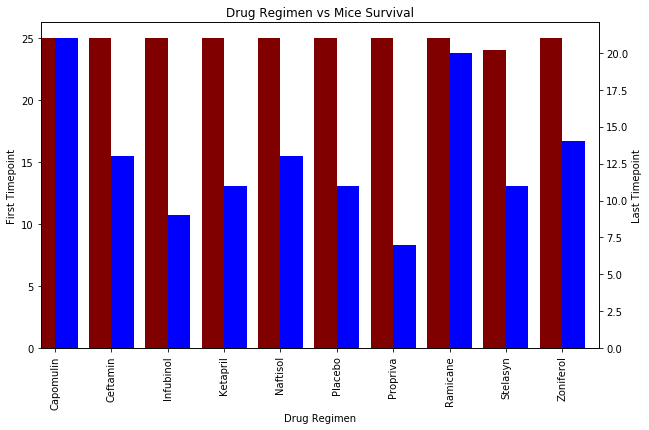

In [19]:
#Plot a bar graph to show mouse count at first and last timepoints for each drug

fig1 = plt.figure() # Create matplotlib figure

ax5 = fig1.add_subplot(111) # Create matplotlib axes
ax6 = ax5.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

Survival_df["First Timepoint"].plot(kind='bar', color='maroon', ax=ax5, width=width, position=1, figsize=(10,6))
Survival_df["Last Timepoint"].plot(kind='bar', color='blue', ax=ax6, width=width, position=0)

ax5.set_ylabel('First Timepoint')
ax6.set_ylabel('Last Timepoint')
plt.title("Drug Regimen vs Mice Survival")

plt.show()